In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [2]:
# Generate synthetic data
np.random.seed(0)  # For reproducibility
x = np.arange(10)  # Independent variable
y = 2.5 * x + np.random.randn(10)  # Dependent variable with some noise


In [3]:
# Perform linear regression
result = linregress(x, y)

print(f"Slope: {result.slope}")
print(f"Intercept: {result.intercept}")
print(f"R-squared: {result.rvalue**2}")


Slope: 2.3298639806396353
Intercept: 1.5036352578504744
R-squared: 0.9846868698779705


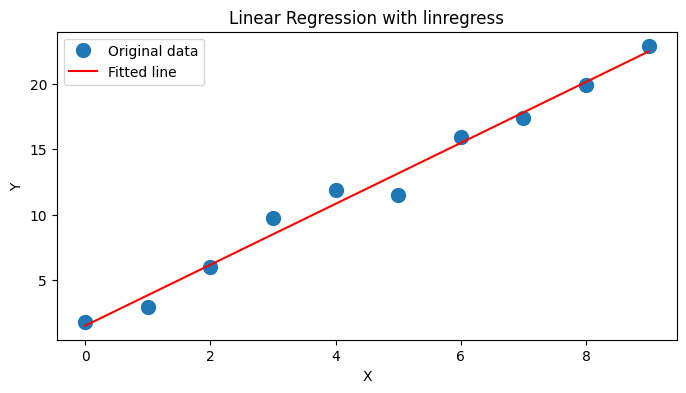

In [4]:
# Plotting the data and the linear fit
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, result.intercept + result.slope * x, 'r', label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with linregress')
plt.legend()
plt.show()


In [ ]:
# Calculate standard error of the slope
n = len(x)
x_mean = np.mean(x)
y_pred = result.intercept + result.slope * x
sse = np.sum((y - y_pred)**2)
se_slope = np.sqrt(sse / (n-2) / np.sum((x - x_mean)**2))

print(f"Standard Error of the Slope: {se_slope}")
